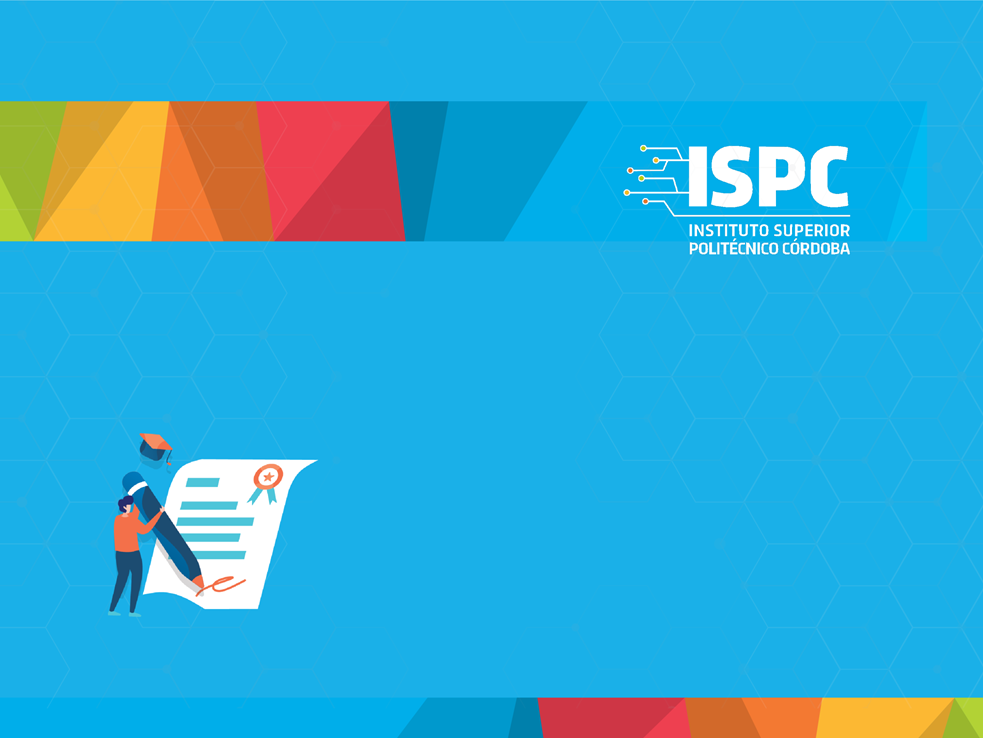

# 11ma Semana 25/08/2021- Algebra, EigenVectores y EigenValores.


https://personal.math.ubc.ca/~pwalls/math-python/linear-algebra/eigenvalues-eigenvectors/
http://personal.cimat.mx:8181/~mrivera/cursos/aprendizaje_maquina/pca/pca.html
https://www.cienciadedatos.net/documentos/35_principal_component_analysis

## Introducción a PCA (Principal Componente Analisis)


Principal Component Analysis (PCA) es un método estadístico que permite simplificar la complejidad de espacios muestrales con muchas dimensiones a la vez que conserva su información. 

Supóngase que existe una muestra con n individuos cada uno con p variables (X1, X2, …, Xp), es decir, el espacio muestral tiene p dimensiones. 

PCA permite encontrar un número de factores subyacentes (z<p) que explican aproximadamente lo mismo que las p variables originales. Donde antes se necesitaban p valores para caracterizar a cada individuo, ahora bastan z valores. Cada una de estas z nuevas variables recibe el nombre de componente principal.

Principal Component Analysis pertenece a la familia de técnicas conocida como unsupervised learning. Los métodos de supervised learning tienen el objetivo de predecir una variable respuesta Y a partir de una serie de predictores. 

Para ello, se dispone de p características (X1, X2 … Xp) y de la variable respuesta Y medidas en n observaciones. 

En el caso de unsupervised learning, la variable respuesta Y no se tiene en cuenta ya que el objetivo no es predecir Y sino extraer información empleando los predictores, por ejemplo, para identificar subgrupos. 

El principal problema al que se enfrentan los métodos de unsupervised learning es la dificultad para validar los resultados dado que no se dispone de una variable respuesta que permita contrastarlos.

El método de PCA permite por lo tanto “condensar” la información aportada por múltiples variables en solo unas pocas componentes. 

Esto lo convierte en un método muy útil de aplicar previa utilización de otras técnicas estadísticas tales como regresión, clustering… Aun así no hay que olvidar que sigue siendo necesario disponer del valor de las variables originales para calcular las componentes.



## Álgebra lineal

En esta sección se describen dos de los conceptos matemáticos que se aplican en el PCA: <b>eigenvectors y eigenvalues</b>. Se trata simplemente de una descripción intuitiva con la única finalidad de facilitar el entendimiento del cálculo de componentes principales.

## Eigenvectors

Supongamos que tenemos una matriz cuadrada $A$ de $n \times n$. Una pregunta natural que nos podríamos hacer sobre $A$ es: ¿Existe algún vector $x$ distinto de cero para el cual $Ax$ es un escalar múltiplo de $x$?. Si llevamos esta pregunta al lenguaje matemático nos vamos a encontrar con la siguiente ecuación:

$$Ax = \lambda x$$

Cuando esta ecuación es válida y $x$ no es cero, decimos que $\lambda$ es el Eigenvalor o valor propio de $A$ y $x$ es su correspondiente Eigenvector o vector propio.

Los eigenvectors son un caso particular de multiplicación entre una matriz y un vector. Obsérvese la siguiente multiplicación:

$$\begin{bmatrix} 2 &  3 \\ 2 & 1\end{bmatrix}.\begin{bmatrix} 3 \\  2\end{bmatrix} = \begin{bmatrix} 12 \\  8\end{bmatrix}= 4 . \begin{bmatrix} 3 \\  2\end{bmatrix}$$


El vector resultante de la multiplicación es un múltiplo entero del vector original. Los eigenvectors de una matriz son todos aquellos vectores que, al multiplicarlos por dicha matriz, resultan en el mismo vector o en un múltiplo entero del mismo. Los eigenvectors tienen una serie de propiedades matemáticas específicas:

- Los eigenvectors solo existen para matrices cuadradas y no para todas. En el caso de que una matriz n x n tenga eigenvectors, el número de ellos es n.

- Si se escala un eigenvector antes de multiplicarlo por la matriz, se obtiene un múltiplo del mismo eigenvector. Esto se debe a que si se escala un vector multiplicándolo por cierta cantidad, lo único que se consigue es cambiar su longitud pero la dirección es la misma.

- Todos los eigenvectors de una matriz son perpendiculares (ortogonales) entre ellos, independientemente de las dimensiones que tengan.

Dada la propiedad de que multiplicar un eigenvector solo cambia su longitud pero no su naturaleza de eigenvector, es frecuente escalarlos de tal forma que su longitud sea 1. De este modo se consigue que todos ellos estén estandarizados. A continuación se muestra un ejemplo:

El eigenvector $\begin{bmatrix} 3 \\  2\end{bmatrix}$
tiene una longitud de $\sqrt{3^2+2^2} = \sqrt{13}$

. Si se divide cada dimensión entre la longitud del vector, se obtiene el eigenvector estandarizado con longitud 1.

 $\begin{bmatrix} 3 \\  2\end{bmatrix}$ dividido $\sqrt{13}$ = $\frac { \frac{3}{\sqrt{13}}} {\frac{2}{\sqrt{13}}}$



## Eigenvalue

Cuando se multiplica una matriz por alguno de sus eigenvectors se obtiene un múltiplo del vector original, es decir, el resultado es ese mismo vector multiplicado por un número. 

Al valor por el que se multiplica el eigenvector resultante se le conoce como <b>eigenvalue</b>. A todo eigenvector le corresponde un eigenvalue y viceversa.

En el método PCA, cada una de las componentes se corresponde con un eigenvector, y el orden de componente se establece por orden decreciente de eigenvalue. Así pues, la primera componente es el eigenvector con el eigenvalue asociado más alto.

## Interpretación geométrica de las componentes principales


Una forma intuitiva de entender el proceso de PCA consiste en interpretar las componentes principales desde un punto de vista geométrico. 

Supóngase un conjunto de observaciones para las que se dispone de dos variables (X1, X2). El vector que define la primera componente principal (Z1) sigue la dirección en la que las observaciones varían más (linea roja). 

La proyección de cada observación sobre esa dirección equivale al valor de la primera componente para dicha observación (principal component scores, $z_{i1}$).


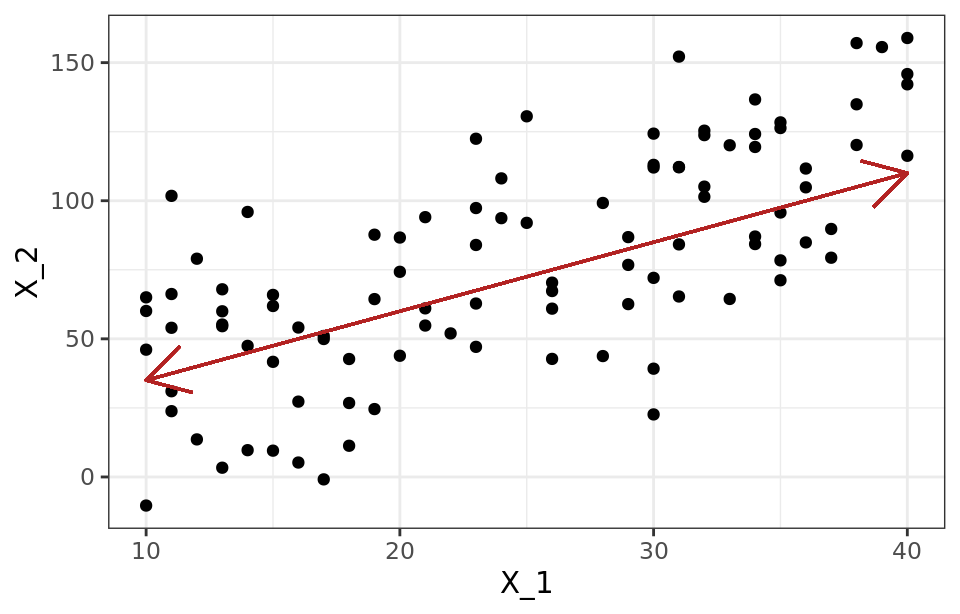



La segunda componente (Z2) sigue la segunda dirección en la que los datos muestran mayor varianza y que no está correlacionada con la primera componente. La condición de no correlación entre componentes principales equivale a decir que sus direcciones son perpendiculares/ortogonales.

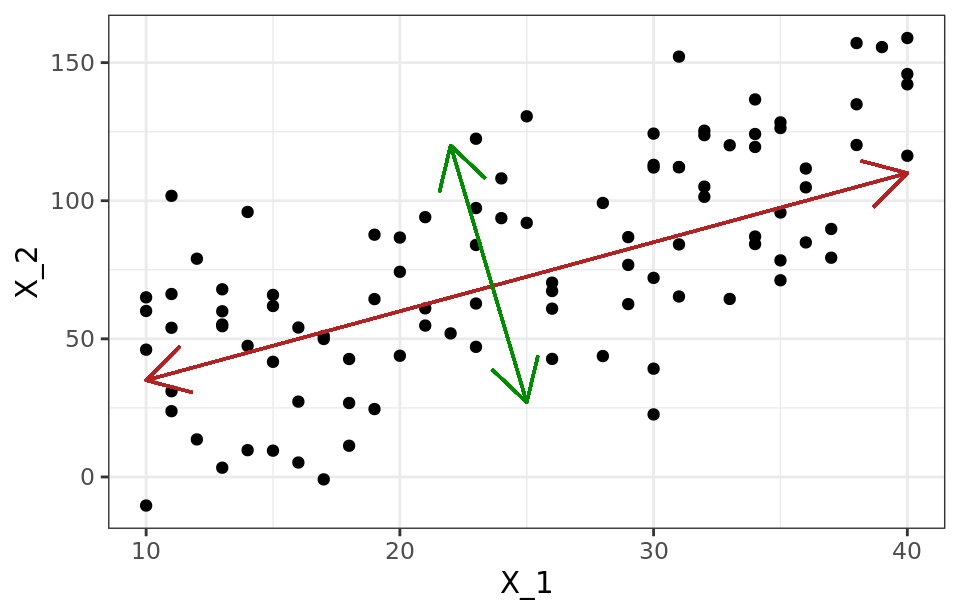

## Aplicación de los EigenVectores y EigenValores - Cálculo de las componentes principales


Cada componente principal $Z_i$ se obtiene por combinación lineal de las variables originales. Se pueden entender como nuevas variables obtenidas al combinar de una determinada forma las variables originales. 

La primera componente principal de un grupo de variables $X1, X2, …, Xp$ es la combinación lineal normalizada de dichas variables que tiene mayor varianza:

$$Z1=ϕ_{11}X_1+ϕ_{21}X_2+...+ϕ_{p1}X_p$$

Que la combinación lineal sea normalizada implica que:

$$\sum^{p}_{j=1}  ϕ^2_{j1} = 1$$

Los términos ϕ11, …, ϕ1p reciben en el nombre de loadings y son los que definen a la componente. ϕ11 es el loading de la variable X1 de la primera componente principal. 

Los loadings pueden interpretarse como el peso/importancia que tiene cada variable en cada componente y, por lo tanto, ayudan a conocer que tipo de información recoge cada una de las componentes.

Dado un set de datos X con n observaciones y p variables, el proceso a seguir para calcular la primera componente principal es:

- Centralización de las variables: se resta a cada valor la media de la variable a la que pertenece. Con esto se consigue que todas las variables tengan media cero.

- Se resuelve un problema de optimización para encontrar el valor de los loadings con los que se maximiza la varianza. Una forma de resolver esta optimización es mediante el cálculo de eigenvector-eigenvalue de la matriz de covarianzas.

Una vez calculada la primera componente (Z1) se calcula la segunda (Z2) repitiendo el mismo proceso, pero añadiendo la condición de que la combinación lineal no pude estar correlacionada con la primera componente. 

Esto equivale a decir que Z1 y Z2 tienen que ser perpendiculares. EL proceso se repite de forma iterativa hasta calcular todas las posibles componentes (min(n-1, p)) o hasta que se decida detener el proceso. El orden de importancia de las componentes viene dado por la magnitud del eigenvalue asociado a cada eigenvector.




## ¿Qué es Principal Component Analysis?

Entonces Principal Component Analysis es una técnica de Extracción de Características donde combinamos las entradas de una manera específica y podemos eliminar algunas de las variables “menos importantes” manteniendo la parte más importante todas las variables. Como valor añadido, luego de aplicar PCA conseguiremos que todas las nuevas variables sean independientes una de otra.

## ¿Cómo funciona PCA?

En resumen lo que hace el algoritmo es:

- Estandarizar los datos de entrada (ó Normalización de las Variables)
- Obtener los autovectores y autovalores de la matriz de covarianza
- Ordenar los autovalores de mayor a menor y elegir los “k” autovectores que se correspondan con los autovectores “k” más grandes (donde “k” es el número de dimensiones del nuevo subespacio de características).
- Construir la matriz de proyección W con los “k” autovectores seleccionados.
- Transformamos el dataset original “X estandarizado” vía W para obtener las nuevas características k-dimensionales.


### Ejecutar el ejemplo en python del link
https://www.aprendemachinelearning.com/comprende-principal-component-analysis/


In [11]:
import numpy as np
# Eigenvalores con numpy
A = np.array([[3, 2],
              [7, -2]])

x, v = np.linalg.eig(A)

# x Eigenvalor, v Eigenvector
x, v

(array([ 5., -4.]),
 array([[ 0.70710678, -0.27472113],
        [ 0.70710678,  0.96152395]]))

In [12]:
import sympy
# Eigenvalores con SymPy
B = sympy.Matrix([[3, 2],
                  [7, -2]])

# Eigenvalor
B.eigenvals()

In [17]:
B.eigenvects()

⎡⎛       ⎡⎡-2/7⎤⎤⎞  ⎛      ⎡⎡1⎤⎤⎞⎤
⎢⎜-4, 1, ⎢⎢    ⎥⎥⎟, ⎜5, 1, ⎢⎢ ⎥⎥⎟⎥
⎣⎝       ⎣⎣ 1  ⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠⎦

In [18]:
# comprobando la solución Ax = λx
# x eigenvector, v eigenvalue
x = A.eigenvects()[0][2][0]
v = A.eigenvects()[0][0]

# Ax == vx
A*x, v*x

AttributeError: 'numpy.ndarray' object has no attribute 'eigenvects'

In [1]:
from sympy import *
init_printing()

# x'sa minúsculas son las entradas de la matriz de datos
# Xi mayúsculas es cada observacion
# Xses ma muestra toital (todos los datos ordenados por renglon), ecuación (2)

X1 = Matrix(symbols('x1(1:4)'))
X2 = Matrix(symbols('x2(1:4)'))
X3 = Matrix(symbols('x3(1:4)'))
X4 = Matrix(symbols('x4(1:4)'))
          
Xs = Matrix([X1.T, X2.T, X3.T, X4.T])
Xs

⎡x₁₁  x₁₂  x₁₃⎤
⎢             ⎥
⎢x₂₁  x₂₂  x₂₃⎥
⎢             ⎥
⎢x₃₁  x₃₂  x₃₃⎥
⎢             ⎥
⎣x₄₁  x₄₂  x₄₃⎦

In [2]:
#matriz (escalada por m), ecuación (4)
Xs.T*Xs

⎡         2      2      2      2                                              
⎢      x₁₁  + x₂₁  + x₃₁  + x₄₁         x₁₁⋅x₁₂ + x₂₁⋅x₂₂ + x₃₁⋅x₃₂ + x₄₁⋅x₄₂ 
⎢                                                                             
⎢                                                2      2      2      2       
⎢x₁₁⋅x₁₂ + x₂₁⋅x₂₂ + x₃₁⋅x₃₂ + x₄₁⋅x₄₂        x₁₂  + x₂₂  + x₃₂  + x₄₂        
⎢                                                                             
⎢                                                                             
⎣x₁₁⋅x₁₃ + x₂₁⋅x₂₃ + x₃₁⋅x₃₃ + x₄₁⋅x₄₃  x₁₂⋅x₁₃ + x₂₂⋅x₂₃ + x₃₂⋅x₃₃ + x₄₂⋅x₄₃ 

                                      ⎤
 x₁₁⋅x₁₃ + x₂₁⋅x₂₃ + x₃₁⋅x₃₃ + x₄₁⋅x₄₃⎥
                                      ⎥
                                      ⎥
 x₁₂⋅x₁₃ + x₂₂⋅x₂₃ + x₃₂⋅x₃₃ + x₄₂⋅x₄₃⎥
                                      ⎥
          2      2      2      2      ⎥
       x₁₃  + x₂₃  + x₃₃  + x₄₃       ⎦

In [25]:
#datos <- data.frame(X1 = c(2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2, 1, 1.5, 1.1),
#                    X2 = c(2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9))

datos=np.matrix([[2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2, 1, 1.5, 1.1],
                [2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9]])
datos

matrix([[2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2. , 1. , 1.5, 1.1],
        [2.4, 0.7, 2.9, 2.2, 3. , 2.7, 1.6, 1.1, 1.6, 0.9]])

In [26]:
datos_centrados = datos - datos.mean()
datos_centrados

matrix([[ 0.64, -1.36,  0.34,  0.04,  1.24,  0.44,  0.14, -0.86, -0.36,
         -0.76],
        [ 0.54, -1.16,  1.04,  0.34,  1.14,  0.84, -0.26, -0.76, -0.26,
         -0.96]])

In [27]:
cov = np.cov(datos_centrados)
cov

array([[0.61655556, 0.61544444],
       [0.61544444, 0.71655556]])

In [28]:
x, v = np.linalg.eig(cov)
x, v

(array([0.0490834 , 1.28402771]),
 array([[-0.73517866, -0.6778734 ],
        [ 0.6778734 , -0.73517866]]))

In [31]:
v.T

array([[-0.73517866,  0.6778734 ],
       [-0.6778734 , -0.73517866]])

In [29]:
pc_scores = v.dot(datos_centrados)
pc_scores

matrix([[-0.83656597,  1.78617611, -0.95494908, -0.2598841 , -1.68439721,
         -0.89289226,  0.07332207,  1.14743743,  0.4409114 ,  1.20949424],
        [ 0.0368425 , -0.06910058, -0.53410885, -0.22284581,  0.00245935,
         -0.31928578,  0.28604873, -0.02423534, -0.05288797,  0.19058773]])

In [30]:
datos_recuperados = v.dot(pc_scores)
datos_recuperados

matrix([[ 0.5900509 , -1.26631711,  1.06411636,  0.34212249,  1.23666575,
          0.87287067, -0.24780964, -0.82714301, -0.2882973 , -1.0183887 ],
        [-0.59417164,  1.26160255, -0.25466915, -0.01233704, -1.14361612,
         -0.37053583, -0.16059384,  0.79563462,  0.33776422,  0.67976794]])

In [20]:
!pip install rpy2

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Acceso denegado: 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\backports\\__init__.py'
Consider using the `--user` option or check the permissions.




  Created wheel for rpy2: filename=rpy2-3.4.5-py3-none-any.whl size=198845 sha256=184337ffa923db6c16145e6ba66a384a2d8a4e471001a8e41a9e51d379d708a8
  Stored in directory: c:\users\narw10\appdata\local\pip\cache\wheels\46\00\c5\a43320afe86e7540d16d7f07cf4d29547d98921e76ea9f2f7a
Successfully built rpy2


In [24]:
from rpy2.robjects import r

ModuleNotFoundError: No module named 'rpy2'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
 
#cargamos los datos de entrada
dataframe = pd.read_csv(r"comprar_alquilar.csv")
print(dataframe.tail(10))
 
#normalizamos los datos
scaler=StandardScaler()
df = dataframe.drop(['comprar'], axis=1) # quito la variable dependiente "Y"
scaler.fit(df) # calculo la media para poder hacer la transformacion
X_scaled=scaler.transform(df)# Ahora si, escalo los datos y los normalizo
 


     ingresos  gastos_comunes  pago_coche  gastos_otros  ahorros  vivienda  \
192      4653            1024         447           703    16952    392957   
193      3390             881         194           584    34601    304112   
194      2969             623          72           620    29663    289205   
195      4169            1292          48           333    28503    239872   
196      4054            1095         371           440    22183    223971   
197      3831             690         352           488    10723    363120   
198      3961            1030         270           475    21880    280421   
199      3184             955         276           684    35565    388025   
200      3334             867         369           652    19985    376892   
201      3988            1157         105           382    11980    257580   

     estado_civil  hijos  trabajo  comprar  
192             0      0        3        0  
193             2      2        5        0  
194   

In [5]:
df

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo
0,6000,1000,0,600,50000,400000,0,2,2
1,6745,944,123,429,43240,636897,1,3,6
2,6455,1033,98,795,57463,321779,2,1,8
3,7098,1278,15,254,54506,660933,0,0,3
4,6167,863,223,520,41512,348932,0,0,3
...,...,...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,0,0,2
198,3961,1030,270,475,21880,280421,2,3,8
199,3184,955,276,684,35565,388025,1,3,8
200,3334,867,369,652,19985,376892,1,2,5


In [3]:
X_scaled.shape

(202, 9)

shape of X_pca (202, 9)
[0.29913557 0.23294923 0.11711241 0.10685622 0.09635279 0.05629866
 0.04145579 0.03017819 0.01966115]
suma: 0.8524062117714309


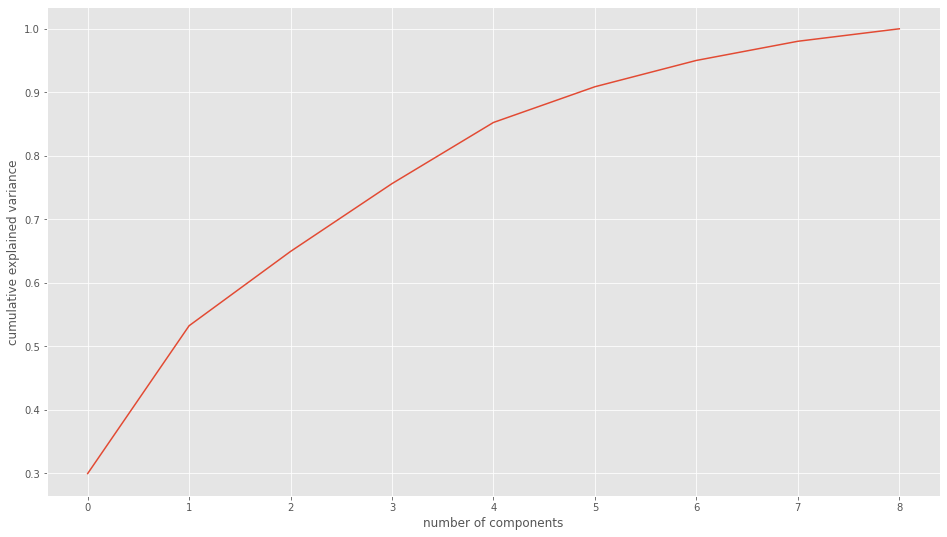

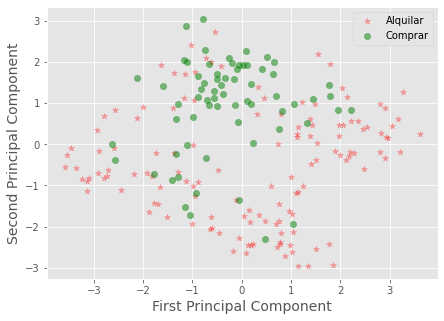

In [6]:
#Instanciamos objeto PCA y aplicamos
pca=PCA(n_components=9) # Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
pca.fit(X_scaled) # obtener los componentes principales
X_pca=pca.transform(X_scaled) # convertimos nuestros datos con las nuevas dimensiones de PCA
 
print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))
#Vemos que con 5 componentes tenemos algo mas del 85% de varianza explicada
 
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
 
#graficamos en 2 Dimensiones, tomando los 2 primeros componentes principales
Xax=X_pca[:,0]
Yax=X_pca[:,1]
labels=dataframe['comprar'].values
cdict={0:'red',1:'green'}
labl={0:'Alquilar',1:'Comprar'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],label=labl[l],s=40,marker=marker[l],alpha=alpha[l])

plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()

In [10]:
X_pca[5:][]

AttributeError: 'numpy.ndarray' object has no attribute 'head'